In [65]:
import pandas as pd

air_quality = pd.read_csv(r"C:\Users\polit\python_Pandas\air_quality_no2.csv")

# 읽어올 때부터 date parsing해주기
# air_quality = pd.read_csv(r"C:\Users\polit\python_Pandas\air_quality_no2.csv", parse_dates['date.utc'])

In [82]:
air_quality = air_quality.rename(columns = {'date.utc' : 'datetime'})
air_quality = air_quality.drop(['Unnamed: 0'], axis = 1)

In [67]:
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2068 non-null   int64  
 1   city        2068 non-null   object 
 2   country     2068 non-null   object 
 3   datetime    2068 non-null   object 
 4   location    2068 non-null   object 
 5   parameter   2068 non-null   object 
 6   value       2068 non-null   float64
 7   unit        2068 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 129.4+ KB


In [68]:
air_quality['datetime'] = pd.to_datetime(air_quality['datetime'])

In [45]:
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   Unnamed: 0  2068 non-null   int64              
 1   city        2068 non-null   object             
 2   country     2068 non-null   object             
 3   dateTime    2068 non-null   datetime64[ns, UTC]
 4   location    2068 non-null   object             
 5   parameter   2068 non-null   object             
 6   value       2068 non-null   float64            
 7   unit        2068 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(5)
memory usage: 129.4+ KB


# 날짜 / 시간 연산
### Timedelta : 시간
### Timestamp : 시각

In [52]:
print(air_quality['datetime'].min())
print(air_quality['datetime'].max())
print(air_quality['datetime'].max() - air_quality['datetime'].min())

2019-05-07 01:00:00+00:00
2019-06-21 00:00:00+00:00
44 days 23:00:00


# timestamp에서 원하는 데이터 추출

In [70]:
air_quality['month'] = air_quality['datetime'].dt.month
air_quality[['month', 'datetime']].head(2)

,month,datetime
0,6,2019-06-21 00:00:00+00:00
1,6,2019-06-20 23:00:00+00:00


In [83]:
air_quality['year'] = air_quality['datetime'].dt.year
air_quality['weekofyear'] = air_quality['datetime'].dt.isocalendar().week # 0 : 월요일 
air_quality['quarter'] = air_quality['datetime'].dt.quarter
air_quality['hour'] = air_quality['datetime'].dt.hour
air_quality['weekday'] = air_quality['datetime'].dt.weekday
air_quality

,city,country,datetime,location,parameter,value,unit,month,year,weekOfYear,weekofyear,quarter,hour,weekday
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,6,2019,25,25,2,0,4
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,6,2019,25,25,2,23,3
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,6,2019,25,25,2,22,3
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,6,2019,25,25,2,21,3
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,6,2019,25,25,2,20,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2063,London,GB,2019-05-07 06:00:00+00:00,London Westminster,no2,26.0,µg/m³,5,2019,19,19,2,6,1
2064,London,GB,2019-05-07 04:00:00+00:00,London Westminster,no2,16.0,µg/m³,5,2019,19,19,2,4,1
2065,London,GB,2019-05-07 03:00:00+00:00,London Westminster,no2,19.0,µg/m³,5,2019,19,19,2,3,1
2066,London,GB,2019-05-07 02:00:00+00:00,London Westminster,no2,19.0,µg/m³,5,2019,19,19,2,2,1


In [84]:
air_quality.groupby(['weekday', 'location'])['value'].mean()

weekday  location          
0        BETR801               27.875000
         FR04014               24.856250
         London Westminster    23.969697
1        BETR801               22.214286
         FR04014               30.999359
         London Westminster    24.885714
2        BETR801               21.125000
         FR04014               29.165753
         London Westminster    23.460432
3        BETR801               27.500000
         FR04014               28.600690
         London Westminster    24.780142
4        BETR801               28.400000
         FR04014               31.617986
         London Westminster    26.446809
5        BETR801               33.500000
         FR04014               25.266154
         London Westminster    24.977612
6        BETR801               21.896552
         FR04014               23.274306
         London Westminster    24.859155
Name: value, dtype: float64

Text(0, 0.5, '$NO_2 (µg/m^3)$')

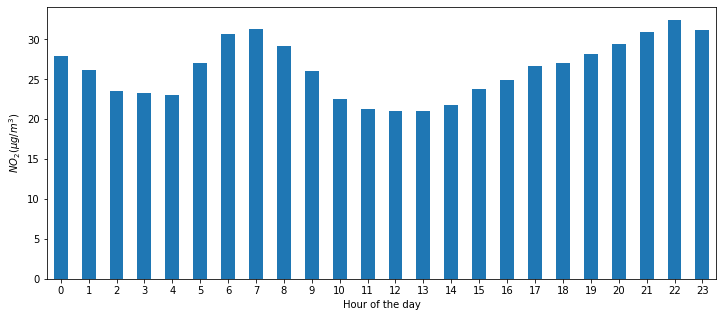

In [89]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(figsize = (12, 5))
air_quality.groupby('hour')['value'].mean().plot(kind = 'bar', ax = axs, rot = 0)
# rot : x축 숫자 세우기
axs.set_xlabel('Hour of the day')
axs.set_ylabel('$NO_2 (µg/m^3)$')

# Datetime as Index

In [92]:
no2 = air_quality.pivot(index = 'datetime', columns = 'location', values = 'value')
no2

location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-07 01:00:00+00:00,50.5,25.0,23.0
2019-05-07 02:00:00+00:00,45.0,27.7,19.0
2019-05-07 03:00:00+00:00,NaN,50.4,19.0
2019-05-07 04:00:00+00:00,NaN,61.9,16.0
2019-05-07 05:00:00+00:00,NaN,72.4,NaN
...,...,...,...
2019-06-20 20:00:00+00:00,NaN,21.4,NaN
2019-06-20 21:00:00+00:00,NaN,24.9,NaN
2019-06-20 22:00:00+00:00,NaN,26.5,NaN


In [93]:
no2.info() # datetime이 index로 들어오염 inedex type이 바뀜

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1033 entries, 2019-05-07 01:00:00+00:00 to 2019-06-21 00:00:00+00:00
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   BETR801             95 non-null     float64
 1   FR04014             1004 non-null   float64
 2   London Westminster  969 non-null    float64
dtypes: float64(3)
memory usage: 32.3 KB


In [96]:
no2.index.hour

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
            15, 16, 17, 18, 19, 20, 21, 22, 23,  0],
           dtype='int64', name='datetime', length=1033)

In [98]:
no2['2019-05-20' :'2019-05-21'].head(3) # 이런식으로 날짜라 슬라이싱할 수 있음 

location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-20 00:00:00+00:00,26.0,16.4,28.0
2019-05-20 01:00:00+00:00,17.0,12.8,28.0
2019-05-20 02:00:00+00:00,10.5,12.1,32.0


<AxesSubplot:xlabel='datetime'>

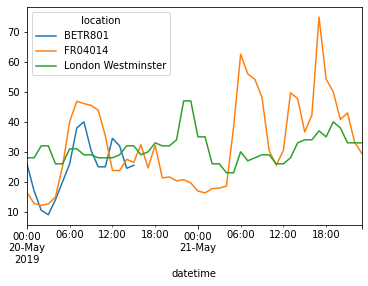

In [99]:
no2['2019-05-20' :'2019-05-21'].plot()

# Resample

In [104]:
no2.head(3)

location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-07 01:00:00+00:00,50.5,25.0,23.0
2019-05-07 02:00:00+00:00,45.0,27.7,19.0
2019-05-07 03:00:00+00:00,NaN,50.4,19.0


In [102]:
# M : month
# D : day
monthly_max = no2.resample("M").max()
monthly_max

location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-31 00:00:00+00:00,74.5,97.0,97.0
2019-06-30 00:00:00+00:00,52.5,84.7,52.0


In [106]:
# .freq : 어떤 유형인지 
# Day 유형
daily_max = no2.resample("D").max()
daily_max.index.freq

<Day>

In [105]:
# Month유형
monthly_max.index.freq

<MonthEnd>

<AxesSubplot:xlabel='datetime'>

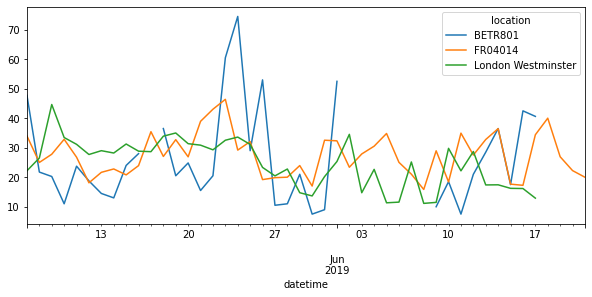

In [109]:
daily_mean = no2.resample("D").mean()
daily_mean.plot(figsize = (10, 4))